## Answer of question no 1

In [ ]:
# Import  the libraires
import pandas as pd
import numpy as plt
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch # to build dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [ ]:
# load the dataset
airline = pd.read_csv("/content/EastWestAirlines.csv")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
# EDA Process
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
airline[airline.duplicated()].shape  

(0, 12)

In [ ]:
airline[airline.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [ ]:
# drop ID# column
airline1 = airline.drop(['ID#'],axis = 1)
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
# To Normalize the Heterogeneous numeric data
airline2 = pd.DataFrame(normalize(airline1),columns=airline1.columns)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


## Hierarchical clustering

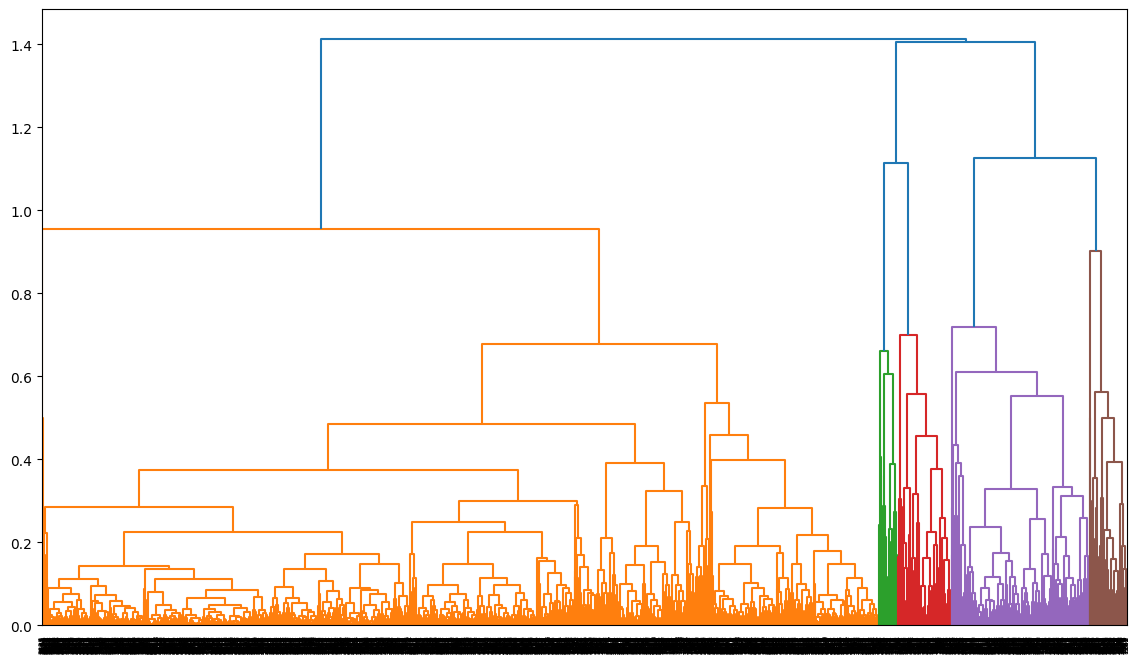

In [ ]:
# create a Dendrograms
plt.figure(figsize=(14,8))
dendograms = sch.dendrogram(sch.linkage(airline2,'complete'))

In [ ]:
# Create Clusters(y)
hclusters = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean',linkage='ward')

In [ ]:
y = pd.DataFrame(hclusters.fit_predict(airline2),columns =['Clusterid'])
y['Clusterid'].value_counts()

2    1547
4    1191
3     579
1     453
0     229
Name: Clusterid, dtype: int64

In [ ]:
# Adding clusters to dataset 
airline3 = airline1.copy()
airline3['Clusterid'] = hclusters.labels_
airline3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [ ]:
airline3.groupby('Clusterid').agg(["mean"]).reset_index()

,Clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004
1,1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


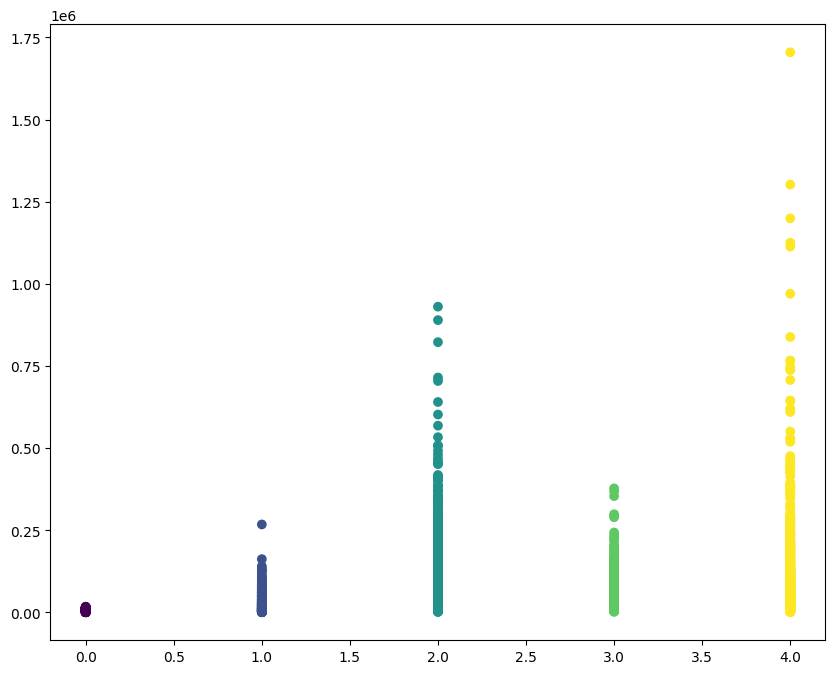

In [ ]:
#plot Clusters
plt.figure(figsize=(10,8))
plt.scatter(airline3['Clusterid'],airline3['Balance'],c = hclusters.labels_)
plt.show()

## K-Means Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

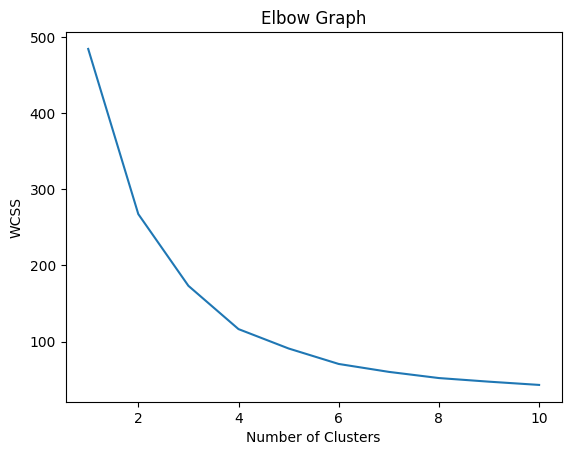

In [ ]:
# within - cluster sum-of-square criterion
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=2)
  kmeans.fit(airline2)
  wcss.append(kmeans.inertia_)
# plot k values range vs wcss to get Elbow graph for choosing k(no. of clussters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# We are selecting 4 no. of clusters from above scree plot
model=KMeans(n_clusters=4,random_state = 2)
model.fit(airline2)
model.labels_

array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

In [ ]:
# Assign clusters to the data set
airline4 = airline1.copy()
airline4['clust'] = model.labels_
airline4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [ ]:
model.cluster_centers_

array([[8.99048678e-01, 2.03403471e-03, 5.68074076e-05, 3.01913199e-05,
        2.95156437e-05, 4.03089039e-01, 4.02398112e-04, 7.62262675e-03,
        2.24052643e-05, 8.50654942e-02, 9.73901648e-06],
       [5.23653977e-01, 2.37603195e-03, 9.13653056e-05, 4.56081254e-05,
        4.45095230e-05, 7.97866700e-01, 5.07019477e-04, 1.75075997e-02,
        5.89123100e-05, 1.31443994e-01, 3.00837174e-05],
       [9.82878899e-01, 3.71612347e-03, 4.15057209e-05, 3.77179195e-05,
        3.76205578e-05, 8.06914054e-02, 1.57453088e-04, 6.65079627e-03,
        2.12921781e-05, 1.03324885e-01, 4.81770304e-06],
       [6.28081328e-01, 9.30359261e-04, 2.06331617e-04, 2.06128767e-04,
        2.05879951e-04, 1.23980626e-01, 4.76413717e-04, 6.66146530e-03,
        2.24385615e-05, 6.89106611e-01, 2.58980762e-05]])

In [ ]:
# Group data by cluster(k=4)
airline4.groupby("clust").agg(["mean"]).reset_index()

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,72378.903670,119.606422,3.077982,1.024771,1.018349,31486.477982,17.476147,445.017431,1.317431,4044.253211,0.477064
1,1,28617.579670,112.000000,3.280220,1.030220,1.068681,42166.565934,17.634615,659.725275,1.909341,4229.689560,0.901099
2,2,88484.857577,175.062961,1.495441,1.008250,1.001737,8110.131568,8.770734,476.973079,1.439427,4060.013895,0.255319
3,3,5129.247934,8.285124,1.004132,1.004132,1.000000,891.388430,3.012397,66.466942,0.194215,4843.239669,0.185950


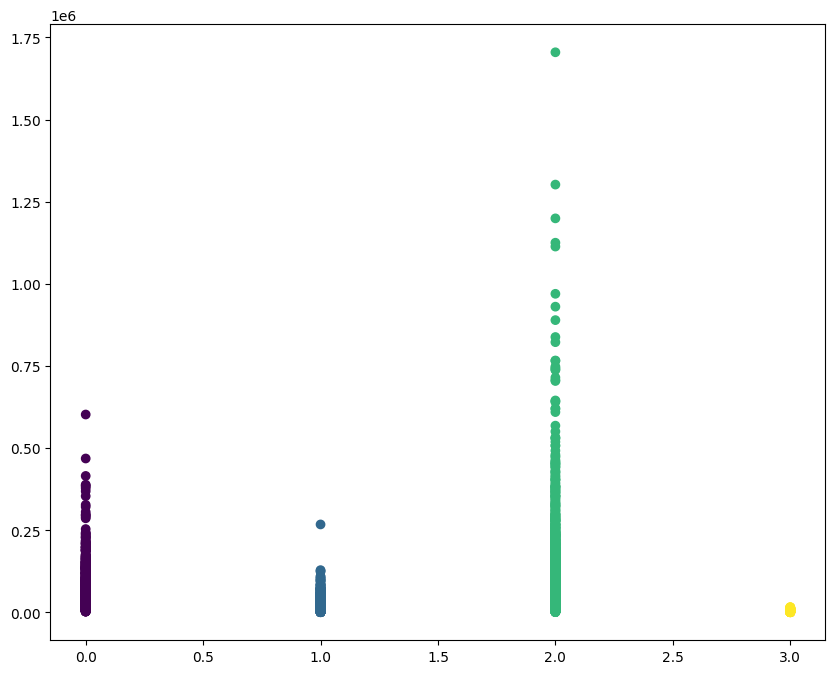

In [ ]:
# plot Clusters
plt.figure(figsize=(10,8))
plt.scatter(airline4['clust'],airline4['Balance'],c=model.labels_)
plt.show()

## DB Scan clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalize Heterogeneous data using standard scalar fit transform to dataset
airline5 = StandardScaler().fit_transform(airline1)
airline5

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
#DBScan Clustering
dbscan = DBSCAN(eps = 1, min_samples = 4)
dbscan.fit(airline5)

DBSCAN(eps=1, min_samples=4)

In [ ]:
# Noisy samples are given the Label -1
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# Adding clusters to dataset
airline1['clusters'] = dbscan.labels_
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
airline1.groupby('clusters').agg(['mean']).reset_index()

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,184694.319471,977.113422,2.763705,1.058601,1.092628,40964.655955,22.765595,2248.875236,6.516068,4754.215501,0.706994
1,0,53978.079794,5.088374,1.658945,1.000000,1.000000,9064.591163,8.487773,138.320463,0.434148,3802.836122,0.000000
2,1,62092.632969,9.785974,2.591985,1.000000,1.000000,22952.648452,12.862477,288.490893,0.913479,4511.039162,1.000000
3,2,34806.538462,0.000000,1.000000,2.000000,1.000000,8389.769231,12.000000,19.230769,0.153846,3186.153846,0.000000
4,3,202750.000000,0.000000,4.000000,1.000000,1.000000,43155.666667,20.333333,2456.666667,4.666667,4447.333333,0.000000
5,4,36413.428571,0.000000,1.000000,3.000000,1.000000,14341.142857,13.857143,57.142857,0.285714,3537.285714,0.000000
6,5,60932.000000,1794.500000,3.750000,1.000000,1.000000,39889.750000,16.250000,250.000000,0.750000,5029.000000,1.000000
7,6,164883.400000,1471.600000,1.000000,1.000000,1.000000,8472.800000,5.000000,300.000000,1.400000,4173.400000,1.000000
8,7,27113.888889,2475.444444,1.000000,1.000000,1.000000,2169.111111,4.555556,44.444444,0.333333,1900.111111,0.000000


# Answer of question no. 2

In [ ]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#load the dataset
crime = pd.read_csv("/content/crime_data.csv")

In [ ]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# EDA preocess

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
crime[crime.duplicated()].shape

(0, 5)

In [ ]:
crime[crime.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


## Hierarchical clustering

In [ ]:
# for normalization 
def norm_func(i):  
  x=(i-i.mean()/i.std())  # apply z-score formula
  return(x)

In [ ]:
df_norm = norm_func(crime.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,11.41192,233.950986,53.472119,18.93317
1,8.21192,260.950986,43.472119,42.23317
2,6.31192,291.950986,75.472119,28.73317
3,7.01192,187.950986,45.472119,17.23317
4,7.21192,273.950986,86.472119,38.33317
5,6.11192,201.950986,73.472119,36.43317
6,1.51192,107.950986,72.472119,8.83317
7,4.11192,235.950986,67.472119,13.53317
8,13.61192,332.950986,75.472119,29.63317
9,15.61192,208.950986,55.472119,23.53317


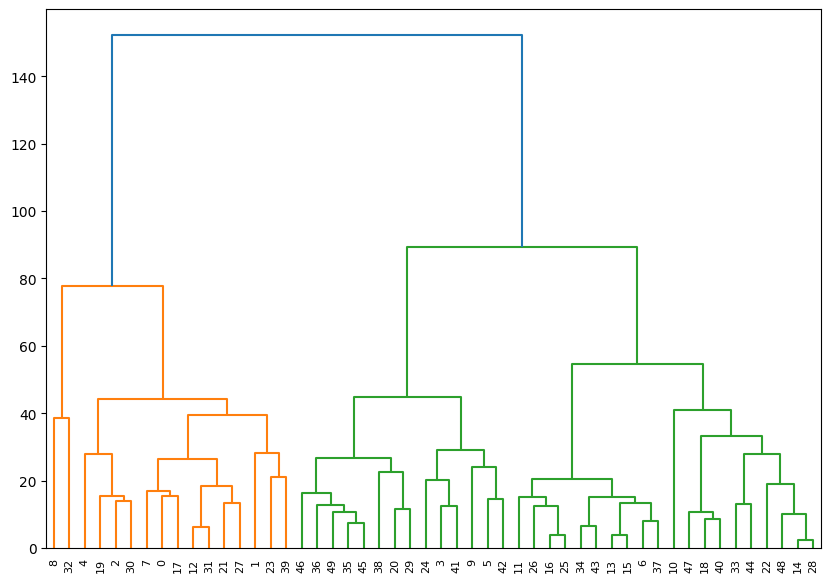

In [ ]:
# create Dendrograms
plt.figure(figsize=(10,7))
dendrograms= sch.dendrogram(sch.linkage(df_norm, method = "average"))

In [ ]:
# create clusters (y)
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage = "complete")
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [ ]:
y =pd.DataFrame(hc.fit_predict(df_norm),columns=["clustersid"])
y["clustersid"].value_counts()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


1    20
0    16
2    14
Name: clustersid, dtype: int64

In [ ]:
s#Adding clusters to dataset
crime["clustersid"] = hc.labels_
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clustersid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,2


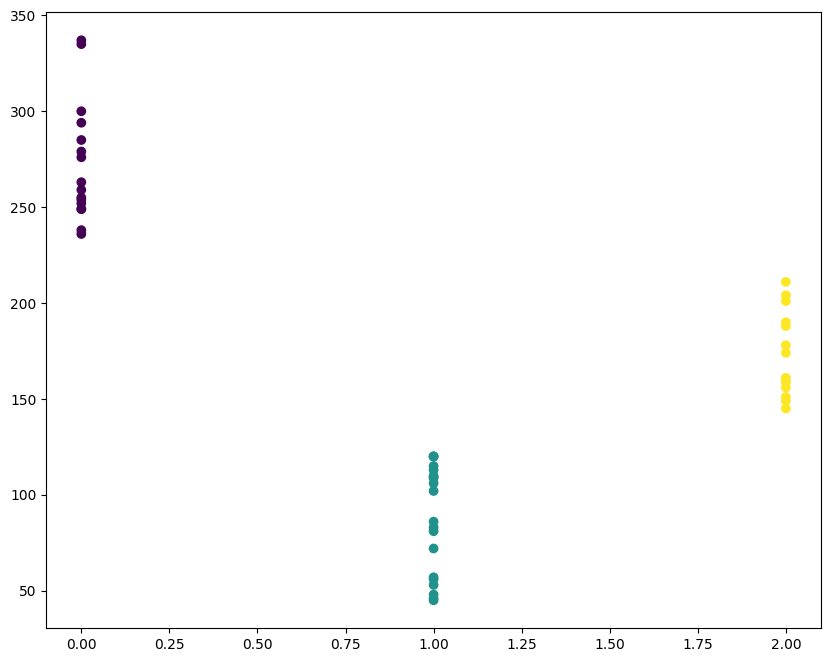

In [ ]:
# plot clusters
plt.figure(figsize=(10,8))
plt.scatter(crime['clustersid'], crime["Assault"] ,c = hc.labels_)
plt.show()

## Kmeans clustering

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import warnings 
warnings.filterwarnings("ignore")

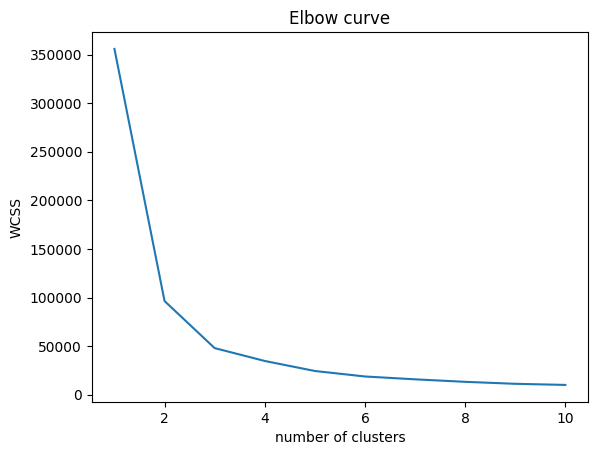

In [ ]:
#Elbow graph/curve
wcss=[]
for i in range(1,11):
  Kmeans = KMeans(n_clusters=i)
  Kmeans.fit(df_norm)
  wcss.append(Kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# We are selecting 4 no. of clusters from above scree plot
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 2, 1,
       0, 1, 2, 3, 3, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2, 3, 2, 1, 0, 2, 2, 3,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [ ]:
# adding clust column to the dataframe
x = pd.Series(model.labels_)
crime['Clust'] = x
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clustersid,Clust
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,2,2
4,California,9.0,276,91,40.6,0,1
5,Colorado,7.9,204,78,38.7,2,2
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,0,1
8,Florida,15.4,335,80,31.9,0,1
9,Georgia,17.4,211,60,25.8,2,2


## DBScan clustering

In [ ]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler

In [ ]:
df = crime.iloc[:,1:5]
df.values

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [ ]:
stscaler = StandardScaler().fit(df.values)
x = stscaler.transform(df.values)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
dbscan = DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)


DBSCAN(eps=2)

In [ ]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
cl= pd.DataFrame(dbscan.labels_,columns = ['cluster'])
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
# Adding another cloumn of cluster to the dataframe
pd.concat([crime,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clustersid,Clust,cluster
0,Alabama,13.2,236,58,21.2,0,1,0
1,Alaska,10.0,263,48,44.5,0,1,-1
2,Arizona,8.1,294,80,31.0,0,1,0
3,Arkansas,8.8,190,50,19.5,2,2,0
4,California,9.0,276,91,40.6,0,1,0
5,Colorado,7.9,204,78,38.7,2,2,0
6,Connecticut,3.3,110,77,11.1,1,0,0
7,Delaware,5.9,238,72,15.8,0,1,0
8,Florida,15.4,335,80,31.9,0,1,0
9,Georgia,17.4,211,60,25.8,2,2,0
